In [20]:
from pathlib import Path
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (10, 5)

# Set path of the dataset
# If you got error with this. Just replace path with the path of your dataset
DATA_PATH = Path("Data") / "Customer-Churn-Records.csv"

# Set dataframe
df = pd.read_csv(DATA_PATH)

# Drop unneeded columns
df = df.drop(columns=["RowNumber","CustomerId","Surname"])

# Format float to 5 decimal places
pd.set_option('display.float_format', '{:.5f}'.format)

In [3]:
# check shape of the dataset
df.shape

(10000, 15)

In [4]:
# get information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [5]:
# varity of the dataset
df.nunique()

CreditScore            460
Geography                3
Gender                   2
Age                     70
Tenure                  11
Balance               6382
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       9999
Exited                   2
Complain                 2
Satisfaction Score       5
Card Type                4
Point Earned           785
dtype: int64

In [19]:
# check for missing values
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [6]:
# check for duplicated values
df.duplicated().sum()

np.int64(0)

In [7]:
# convert columns to list
df.columns.tolist()

# Summary statistics
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,650.52880,38.92180,5.01280,76485.88929,1.53020,0.70550,0.51510,100090.23988,0.20380,0.20440,3.01380,606.51510
std,96.65330,10.48781,2.89217,62397.40520,0.58165,0.45584,0.49980,57510.49282,0.40284,0.40328,1.40592,225.92484
min,350.00000,18.00000,0.00000,0.00000,1.00000,0.00000,0.00000,11.58000,0.00000,0.00000,1.00000,119.00000
25%,584.00000,32.00000,3.00000,0.00000,1.00000,0.00000,0.00000,51002.11000,0.00000,0.00000,2.00000,410.00000
50%,652.00000,37.00000,5.00000,97198.54000,1.00000,1.00000,1.00000,100193.91500,0.00000,0.00000,3.00000,605.00000
75%,718.00000,44.00000,7.00000,127644.24000,2.00000,1.00000,1.00000,149388.24750,0.00000,0.00000,4.00000,801.00000
max,850.00000,92.00000,10.00000,250898.09000,4.00000,1.00000,1.00000,199992.48000,1.00000,1.00000,5.00000,1000.00000


Categorical columns: ['Geography', 'Gender', 'Card Type']


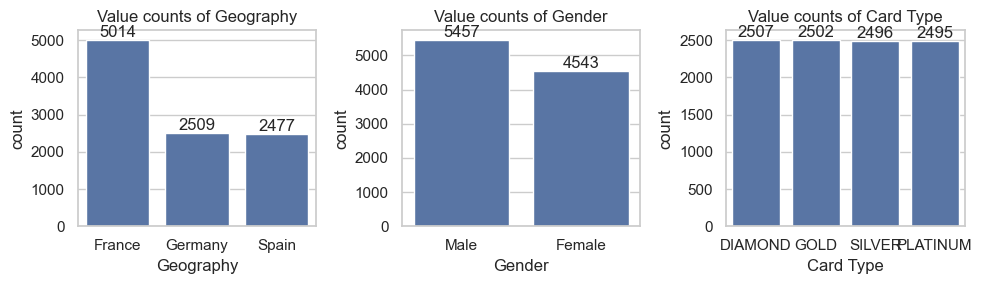

Numeric columns: ['Age', 'Tenure', 'CreditScore', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']


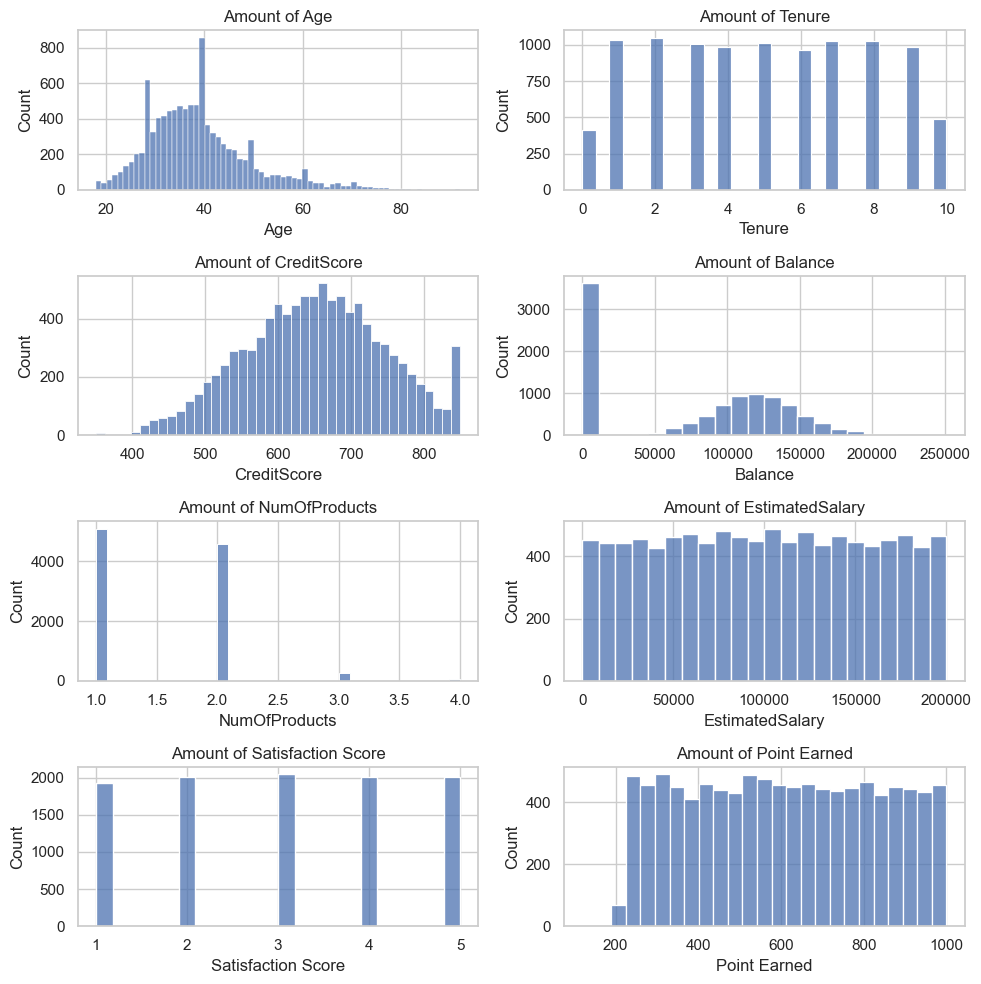

Binary columns: ['HasCrCard', 'IsActiveMember', 'Complain']


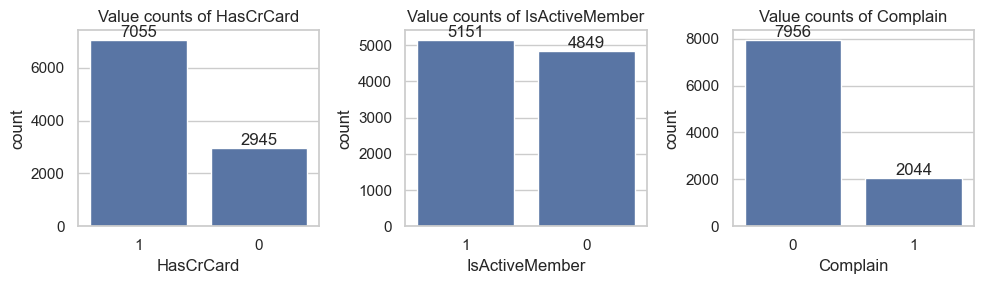

In [8]:
# list of data for graph
barlot = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type']
boxlot = ['Age', 'Tenure', 'CreditScore', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']
cat = ['Geography', 'Gender','Card Type']
nums = boxlot
binary = ['HasCrCard', 'IsActiveMember', 'Complain']

# visualize categorical, numeric and binary columns
print("Categorical columns:", cat)
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i in cat:
    sns.countplot(x=i, data=df, order=df[i].value_counts().index, ax=axes[cat.index(i)])
    axes[cat.index(i)].set_title(f"Value counts of {i}")
    axes[cat.index(i)].bar_label(axes[cat.index(i)].containers[0])
plt.tight_layout()
plt.show()

print("Numeric columns:", nums)
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
for j in nums:
    sns.histplot(x=j, data=df, kde=False , ax=axes[nums.index(j)//2, nums.index(j)%2])
    axes[nums.index(j)//2, nums.index(j)%2].set_title(f"Amount of {j}")
plt.tight_layout()
plt.show()

print("Binary columns:", binary)
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for k in binary:
    sns.countplot(x=k, data=df, order=df[k].value_counts().index, ax=axes[binary.index(k)])
    axes[binary.index(k)].set_title(f"Value counts of {k}")
    axes[binary.index(k)].bar_label(axes[binary.index(k)].containers[0])
plt.tight_layout()
plt.show()


Distribution of each feature by target


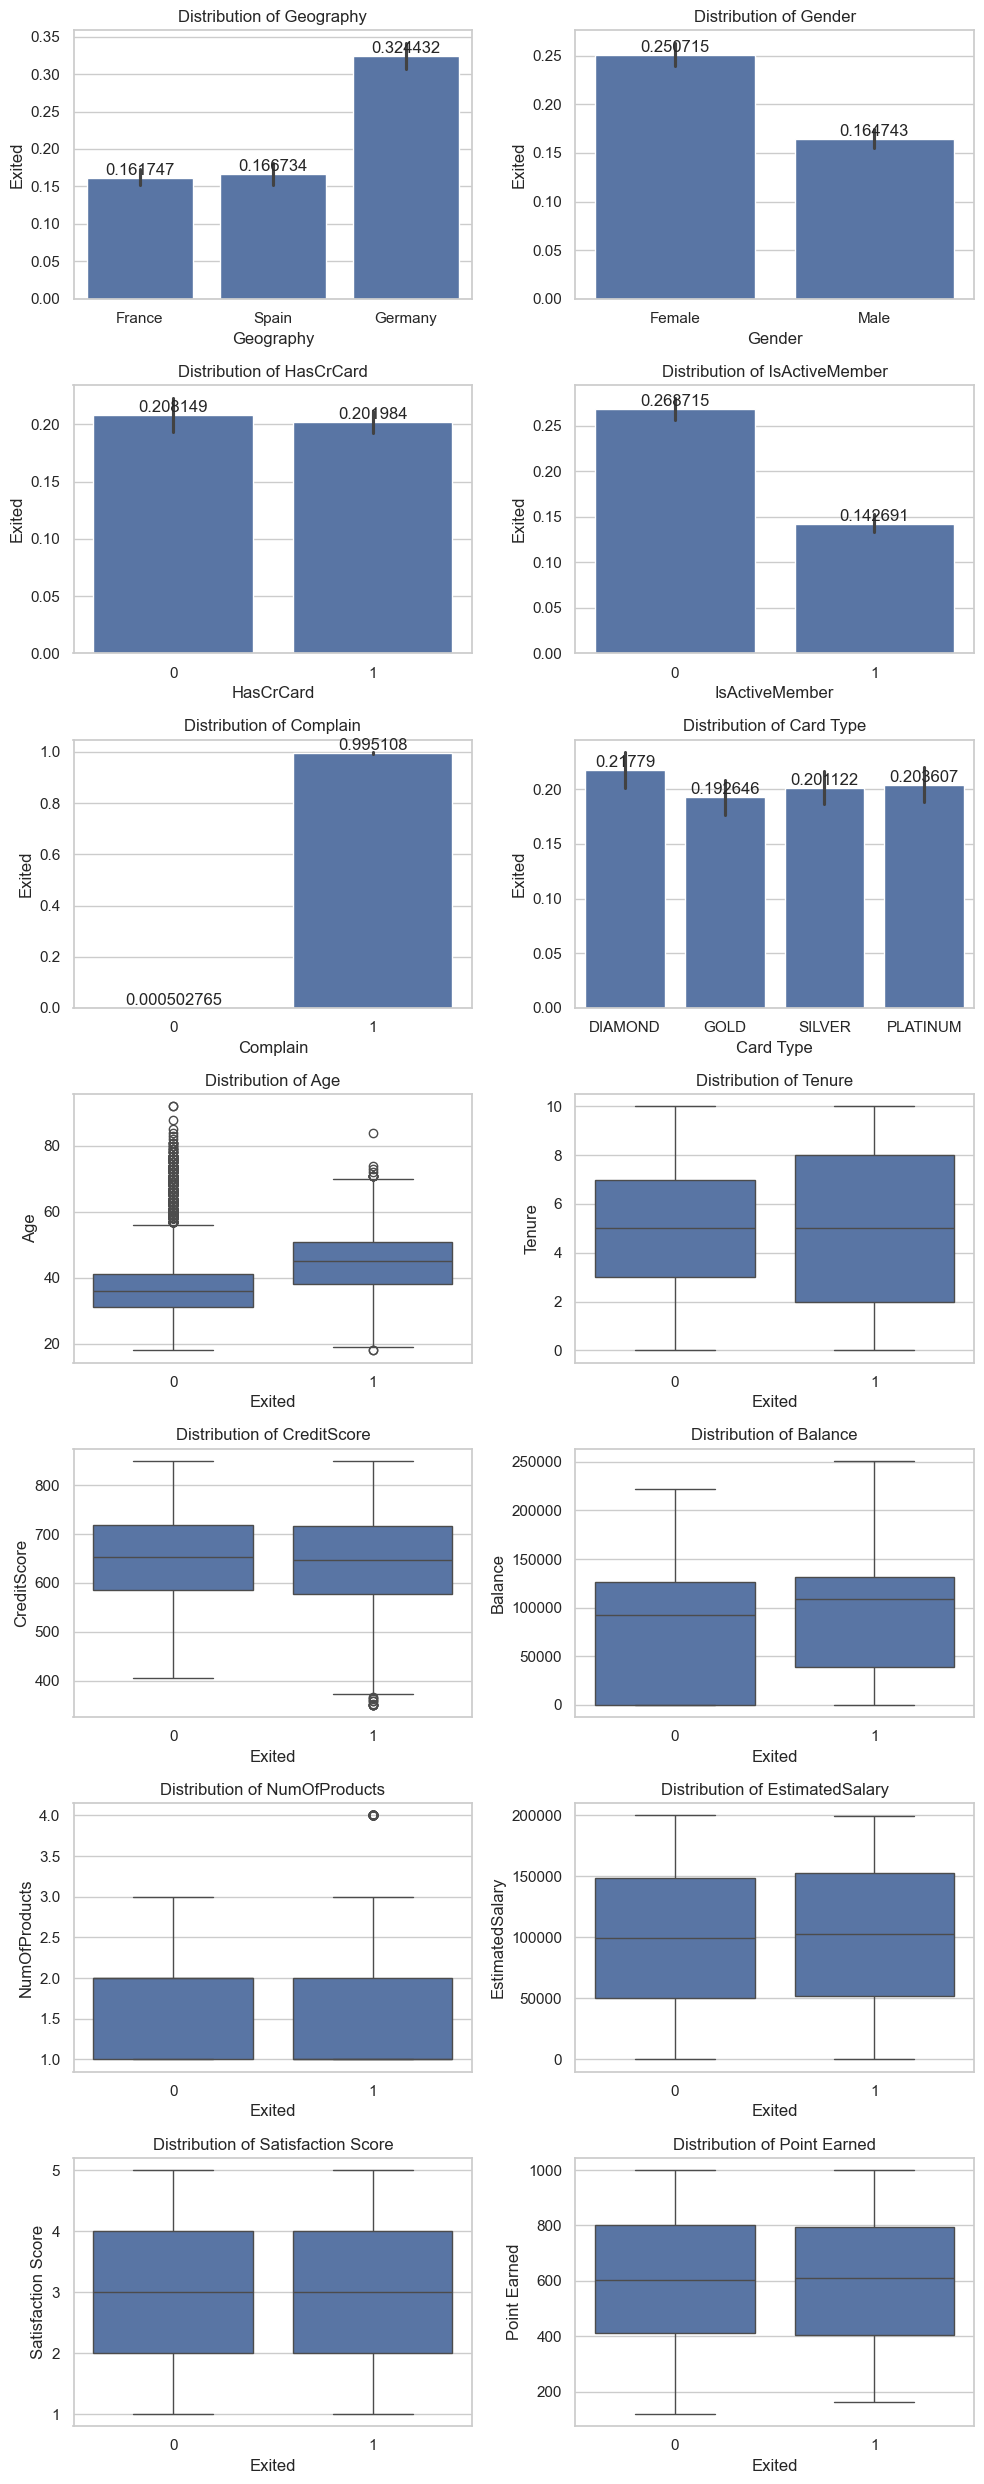

In [9]:
# visualize churn rate of each by target
#
# for bar plot it tells that how many people Exited in each category (in term of average)
# for box plot it tells that how the distribution of numeric feature is for each category of target
#
print("Distribution of each feature by target")
fig, axes = plt.subplots(7, 2, figsize=(10, 25))

for i in barlot:
    sns.barplot(x=i, y='Exited', data=df, ax=axes[barlot.index(i)//2, barlot.index(i)%2])
    axes[barlot.index(i)//2, barlot.index(i)%2].set_title(f"Distribution of {i}")
    axes[barlot.index(i)//2, barlot.index(i)%2].bar_label(axes[barlot.index(i)//2, barlot.index(i)%2].containers[0])

for j in boxlot:
    sns.boxplot(x='Exited', y=j, data=df, ax=axes[3 + boxlot.index(j)//2, boxlot.index(j)%2])
    axes[3 + boxlot.index(j)//2, boxlot.index(j)%2].set_title(f"Distribution of {j}")

plt.tight_layout()
plt.show()

Correlation of each feature with target
Complain: 0.99569
Age: 0.28530
Balance: 0.11858
EstimatedSalary: 0.01249
Point Earned: -0.00463
Satisfaction Score: -0.00585
HasCrCard: -0.00698
Tenure: -0.01366
CreditScore: -0.02677
NumOfProducts: -0.04761
IsActiveMember: -0.15636


Text(0.5, 1.0, 'Correlation of each feature with target')

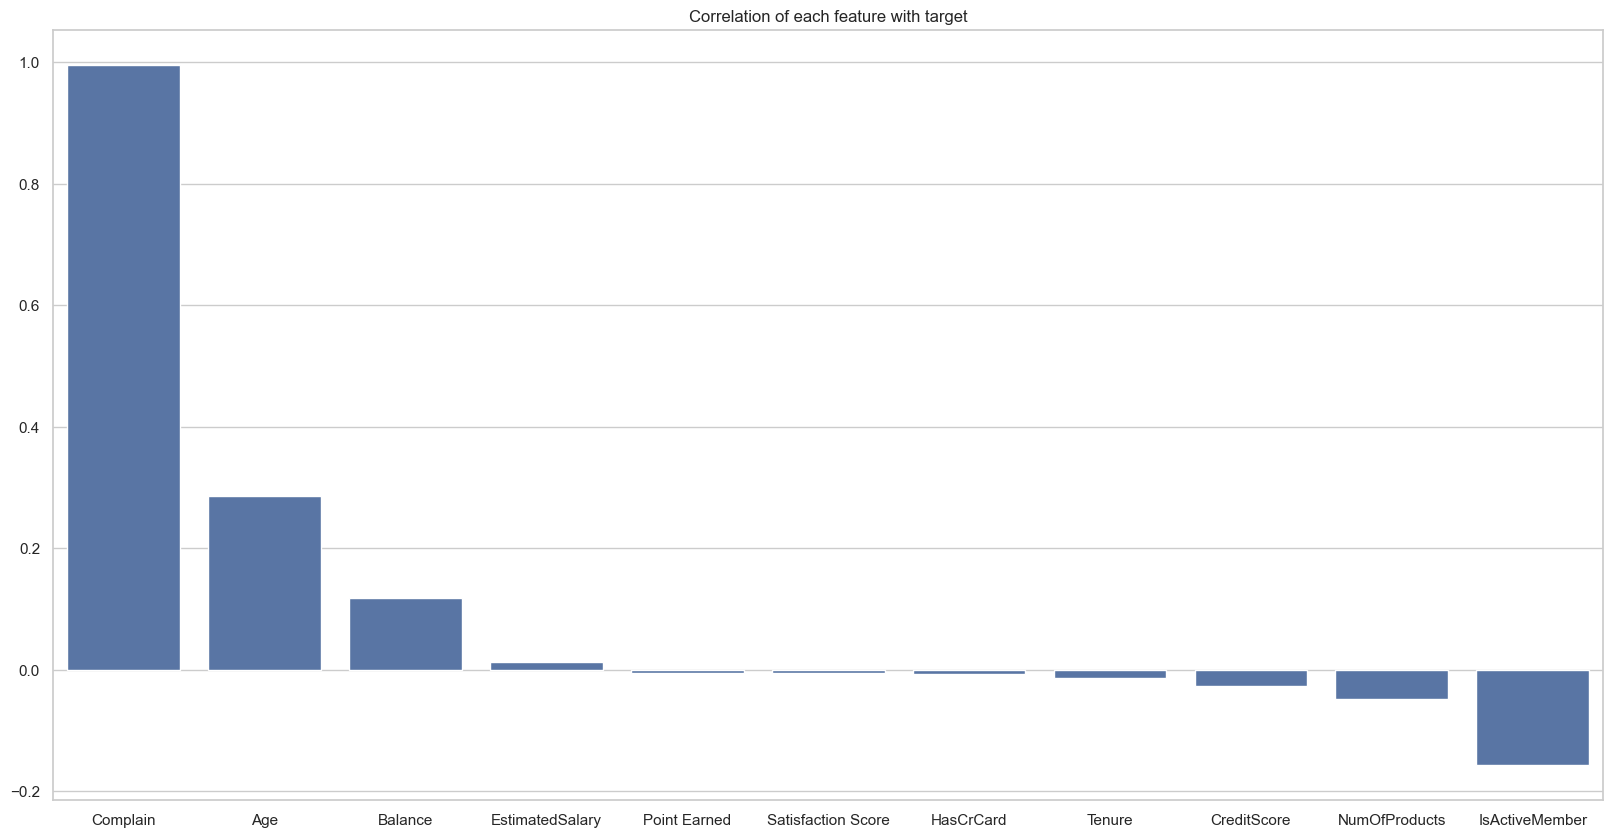

In [10]:
# Correlation of each feature with target
print("Correlation of each feature with target")
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned', 'HasCrCard', 'IsActiveMember', 'Complain']
y = pd.Series(df['Exited'])
res = []
for i in features:
    x = pd.Series(df[i])
    correlation = y.corr(x)
    res.append((i,float(correlation)))
res = sorted(res, key=lambda x: x[1], reverse=True)
for i in res:
    print(f"{i[0]}: {i[1]:.5f}")

# plot correlation bar graph
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=[i[0] for i in res], y=[i[1] for i in res], ax=ax)
ax.set_title("Correlation of each feature with target")


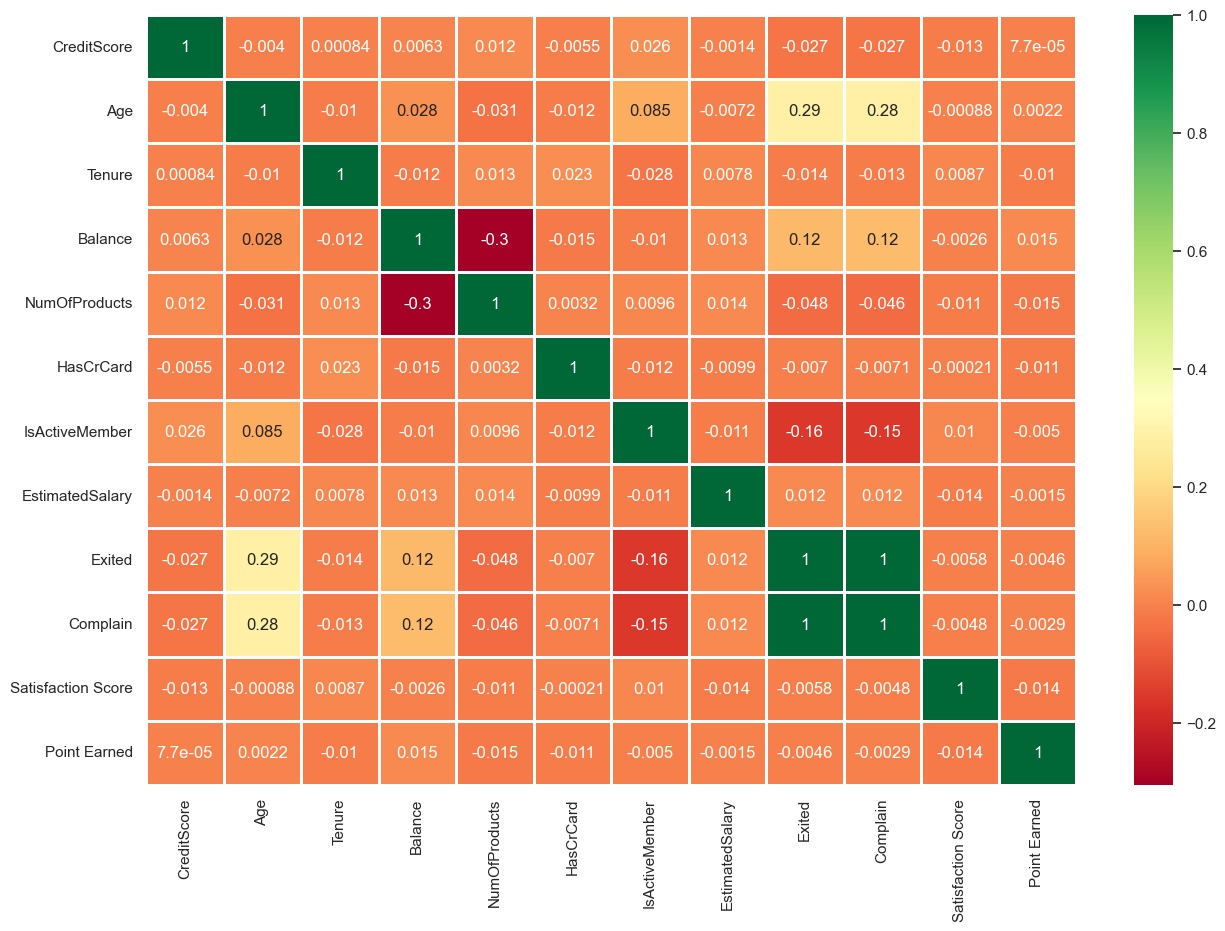

In [27]:
fig, ax = plt.subplots(figsize=(15, 10))

numer = df.select_dtypes(exclude=['object'])
corr_matrix = numer.corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=1)

plt.show()

In [ ]:
# Pearson correlation test
choosen = []
for i in numer:
    if (i == 'Exited'): continue
    r,p = pearsonr(df[i], df['Exited'])
    print(f"{i}: r={r:.5f}, p-value={p:.5f}")
    if (p < 0.05) and (abs(r) > 0.1):
        choosen.append(i)
print("\nChosen features based on Pearson correlation test:", choosen)

CreditScore: r=-0.02677, p-value=0.00742
Age: r=0.28530, p-value=0.00000
Tenure: r=-0.01366, p-value=0.17210
Balance: r=0.11858, p-value=0.00000
NumOfProducts: r=-0.04761, p-value=0.00000
HasCrCard: r=-0.00698, p-value=0.48547
IsActiveMember: r=-0.15636, p-value=0.00000
EstimatedSalary: r=0.01249, p-value=0.21171
Complain: r=0.99569, p-value=0.00000
Satisfaction Score: r=-0.00585, p-value=0.55865
Point Earned: r=-0.00463, p-value=0.64354

Chosen features based on Pearson correlation test: ['Age', 'Balance', 'IsActiveMember', 'Complain']


จากข้อมูลจะสังเกตได้ว่า
1. ไม่มี column ไหนที่มีข้อมูลว่าง
2. ไม่มีชุดข้อมูลที่ซ้ำซ้อนกัน
3. จาก barplot ที่ดูการกระจายตัวของ features กับ target (Exited) และ Correlation graph/heatmap พบว่าข้อมูลที่มีความสัมพันธ์กับ target ปนะกอบด้วย Age(อายุ) Balance(ยอดเงินคงเหลือ) IsActiveMember(เป็นผู้งานประจำ) และ Complain(การร้องเรียน) โดยผมจะอ้างอิงจากค่า P-value และ correlation coefficient(r) ซึ่งจะคำนวณในเซลล์ด้านล่าง โดยจะอิงจากหลักการทางสถิติที่เมื่อ P-value < 0.05 และ correlation coefficient อยู่ในเกณฑ์ที่กำหนด(ในที่นี้ให้เป็น 0.1) แล้วข้อมูลนั้นจะถือว่ามีความสัมพันธ์อย่างมีนัยสำคัญกับ target ซึ่งในที่นี้ค่า r สามารถเปลี่ยนได้ตามความเหมาะสม